In [1]:
import pandas as pd
from collections import defaultdict
from itertools import product
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics

mean -0.063
std 1.161
max 4.07
min -6.451
The size of train set: 13349
       transcript_id          gene_id  \
0  ENST00000361453.3  ENSG00000198763   
1  ENST00000361624.2  ENSG00000198804   

                                            sequence     A549  length  
0  ATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAG...  1.63349    1042  
1  ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...  0.91048    1542  


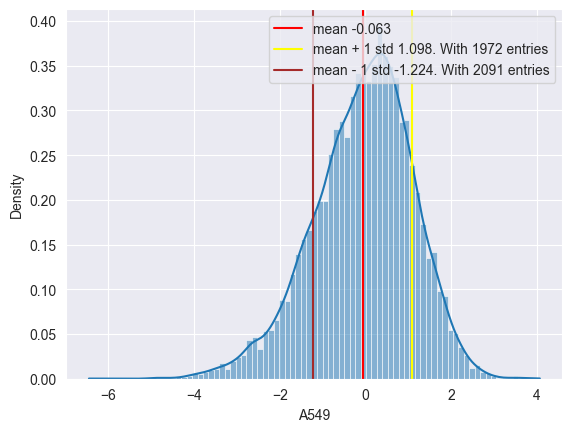

In [2]:
train_set = pd.read_csv('./data/CDHIT/A549/train.csv')
mean = train_set["A549"].mean()
std = np.std(train_set["A549"])
print("mean " + str(round(mean,3)))
print("std "+str(round(std,3)))
print("max "+str(round(max(train_set["A549"]),3)))
print("min "+str(round(min(train_set["A549"]),3)))
print("The size of train set: "+str(len(train_set)))
print(train_set.head(2))

fig = plt.figure()
sns.set_style('darkgrid')

ax = sns.histplot(train_set["A549"],kde=True, stat="density")
plt.axvline(mean,color="red",label = 'mean '+str(round(mean,3)))
plt.axvline(mean+std,color="yellow",label = 'mean + 1 std '+str(round(mean+std,3))+". With "+str(len(train_set[train_set["A549"]>mean+std]))+" entries")
plt.axvline(mean-std,color="brown",label = 'mean - 1 std '+str(round(mean-std,3))+". With "+str(len(train_set[train_set["A549"]<mean-std]))+" entries")
plt.legend(loc = 'upper right')

plt.show()

In [3]:
train_set

transcript_id          gene_id  \
0       ENST00000361453.3  ENSG00000198763   
1       ENST00000361624.2  ENSG00000198804   
2       ENST00000361739.1  ENSG00000198712   
3       ENST00000361227.2  ENSG00000198840   
4       ENST00000361381.2  ENSG00000198886   
...                   ...              ...   
13344  ENST00000271636.12  ENSG00000143375   
13345   ENST00000416743.1  ENSG00000143375   
13346   ENST00000368849.8  ENSG00000143367   
13347   ENST00000703168.1  ENSG00000143442   
13348   ENST00000491586.5  ENSG00000143442   

                                                sequence      A549  length  
0      ATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAG...  1.633490    1042  
1      ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...  0.910480    1542  
2      ATGGCACATGCAGCGCAAGTAGGTCTACAAGACGCTACTTCCCCTA...  1.571460     684  
3      ATAAACTTCGCCTTAATTTTAATAATCAACACCCTCCTAGCCTTAC...  1.070020     346  
4      ATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACAT...  1.608430    1378  
...                                                  ...       ...     ...  
13344  ATGGAGCAGGCACCCAACATGGCTGAGCCCCGGGGCCCCGTAGACC... -2.596940    3612  
13345  NCACAGGACCCCACCATGCTGCAGTTCAAATCAACTCCAGACCTCC... -2.596940     395  
13346  ATGAACGGGACGCGGAACTGGTGTACCCTGGTGGACGTGCACCCAG... -0.179223    1173  
13347  ATGAGAGGGGGATGGGGCCGCATGGCGGACACCGACCTGTTCATGG... -1.285240    4254  
13348  ATGGCGGACACCGACCTGTTCATGGAATGTGAGGAGGAGGAGTTGG... -1.285240    4101  

[13349 rows x 5 columns]

In [5]:
test_set

transcript_id          gene_id  \
0     ENST00000361899.2  ENSG00000198899   
1     ENST00000361681.2  ENSG00000198695   
2     ENST00000453031.1  ENSG00000114374   
3     ENST00000361365.7  ENSG00000198692   
4     ENST00000382772.3  ENSG00000198692   
...                 ...              ...   
3291  ENST00000703262.1  ENSG00000117682   
3292  ENST00000525682.6  ENSG00000117682   
3293  ENST00000703199.1  ENSG00000117682   
3294  ENST00000703202.1  ENSG00000117682   
3295  ENST00000431933.5  ENSG00000117682   

                                               sequence      A549  length  
0     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...  0.948355     681  
1     ATGATGTATGCTTTGTTTCTGTTGAGTGTGGGTTTAGTAATGGGGT... -0.444076     525  
2     NAATTATTGAAGACTGCAGTAACTCAGAGGATACCATCAAATTACT... -0.624562     714  
3     ATGCCCAAGAATAAAGGTAAAGGAGGTAAAAACAGGCGCAGGGGTA...  2.121250     435  
4     ATGCCCAAGAATAAAGGTAAAGGAGGTAAAAACAGGCGCAGGGGTA...  2.121250     384  
...                                                 ...       ...     ...  
3291  ATGTCATGGATCAAGGAAGGAGAGCTGTCACTTTGGGAGCGGTTCT... -0.019093    1065  
3292  ATGTCATGGATCAAGGAAGGAGAGCTGTCACTTTGGGAGCGGTTCT... -0.019093     900  
3293  ATGTCATGGATCAAGGAAGGAGAGCTGTCACTTTGGGAGCGGTTCT... -0.019093     783  
3294  ATGTCATGGATCAAGGAAGGAGAGCTGTCACTTTGGGAGCGGTTCT... -0.019093     858  
3295  CTGGCCCGGCAGAAGTTCAGCCGCTTGATGGAAGAAAAGGAGAAAC... -0.019093     510  

[3296 rows x 5 columns]

mean -0.069
std 1.156
max 3.56
min -4.392
The size of train set: 3296
       transcript_id          gene_id  \
0  ENST00000361899.2  ENSG00000198899   
1  ENST00000361681.2  ENSG00000198695   

                                            sequence      A549  length  
0  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...  0.948355     681  
1  ATGATGTATGCTTTGTTTCTGTTGAGTGTGGGTTTAGTAATGGGGT... -0.444076     525  


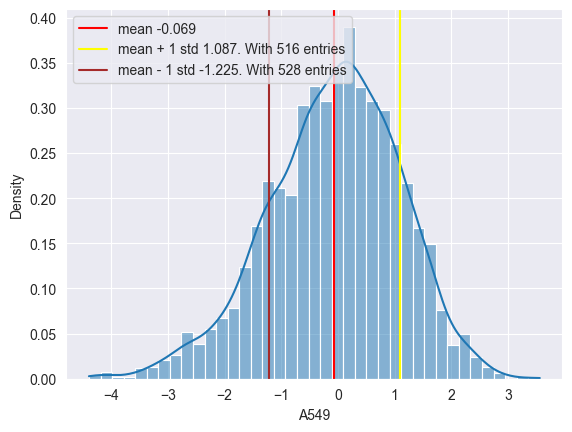

In [4]:
test_set = pd.read_csv('./data/A549/test.csv')
mean = test_set["A549"].mean()
std = np.std(test_set["A549"])
print("mean " + str(round(mean,3)))
print("std "+str(round(std,3)))
print("max "+str(round(max(test_set["A549"]),3)))
print("min "+str(round(min(test_set["A549"]),3)))
print("The size of train set: "+str(len(test_set)))
print(test_set.head(2))

fig = plt.figure()
sns.set_style('darkgrid')

ax = sns.histplot(test_set["A549"],kde=True, stat="density")
plt.axvline(mean,color="red",label = 'mean '+str(round(mean,3)))
plt.axvline(mean+std,color="yellow",label = 'mean + 1 std '+str(round(mean+std,3))+". With "+str(len(test_set[test_set["A549"]>mean+std]))+" entries")
plt.axvline(mean-std,color="brown",label = 'mean - 1 std '+str(round(mean-std,3))+". With "+str(len(test_set[test_set["A549"]<mean-std]))+" entries")
plt.legend(loc = 'upper left')

plt.show()

## Question: For binary class, using same value or strategy as threshold to divide two class

In [6]:
def hamming_distance(x,y):
    """Calculate the Hamming distance between two bit strings"""

    return sum(xi != yi for xi, yi in zip(x, y))


def occurrences(seq, qmers,q, k):
    cnts = defaultdict(float)
    length = len(seq)
    row = {q:i for q,i in zip(qmers, np.zeros(4**q))}
    increment = 1
    for c in range(length-q+1):
        if seq[c] in ["A","G","C","T"]:
            kmer = seq[c:c+q]
            if kmer in cnts:
                continue
            else:
                for j in range(length-q+1):
                    if hamming_distance(kmer, seq[j:j+q])<=k:
                        cnts[kmer] += increment
        else:
            continue
     
        
    for _kmer, n in cnts.items():
        if _kmer in row:
            row[_kmer] = n
            
    return row.values()



In [ ]:
Kmer = 4
df = {}
seqs = test_set['sequence']
for q in range(Kmer,Kmer+1):
    for k in range(0,1):
        kmers = [''.join(i) for i in product("AGTC", repeat=q)]
#         map = {q:i for q,i in zip(kmers, np.zeros(4**q))}
        counts = np.zeros([len(test_set), 4**q], dtype=np.float32)

        for i in range(len(test_set)):
            counts[i] = list(occurrences(seqs[i],kmers,q,k))
            if i % 200==0:
                print("counts ", i)

        index = test_set['transcript_id']
        kmer_counts = pd.DataFrame(data=counts,columns=list(kmers),index = index)
#         kmer_counts /= 1000.0
#         kmer_counts = kmer_counts.div(kmer_counts.sum(axis=0), axis=1)*1000

        kmer_counts[celline] = [x for x in test_set[celline]]
        kmer_counts["length"] = [x for x in test_set["length"]]
        outfile = out_dir+str(q)+'mer'+str(k)+'miss.csv'
        df[k] = kmer_counts
        kmer_counts.to_csv(outfile,mode='w',encoding='utf8')
        if k==0:
            df[q] = kmer_counts

## test exact 4-mer

In [8]:
def kmer_counts_table(dataset,celline,kmer,out_dir,dataset_type):
    df = {}
    seqs = dataset['sequence']
    for q in range(kmer,kmer+1):
        for k in range(0,1):
            kmers = [''.join(i) for i in product("AGTC", repeat=q)]
#             map = {q:i for q,i in zip(kmers, np.zeros(4**q))}
            counts = np.zeros([len(dataset), 4**q], dtype=np.float32)

            for i in range(len(dataset)):
                counts[i] = list(occurrences(seqs[i],kmers,q,k))
                if i % 200==0:
                    print("counts ", i)

            index = dataset['transcript_id']
            kmer_counts = pd.DataFrame(data=counts,columns=list(kmers),index = index)
    #         kmer_counts /= 1000.0
    #         kmer_counts = kmer_counts.div(kmer_counts.sum(axis=0), axis=1)*1000

            kmer_counts[celline] = [x for x in dataset[celline]]
            kmer_counts["length"] = [x for x in dataset["length"]]
            outfile = out_dir+dataset_type+str(q)+'mer'+str(k)+'miss.csv'            
            kmer_counts.to_csv(outfile,mode='w',encoding='utf8')
            df[k] = kmer_counts
            if k==0:
                df[q] = kmer_counts
    return df

In [9]:
Cell_line = "A549"
out_dir='./data/CDHIT/' + Cell_line

Kmer = 4

df_test = kmer_counts_table(test_set,Cell_line,Kmer,out_dir,"test_")
df_train = kmer_counts_table(train_set,Cell_line,Kmer,out_dir,"train_")

counts  0
counts  200
counts  400
counts  600
counts  800
counts  1000
counts  1200
counts  1400
counts  1600
counts  1800
counts  2000
counts  2200
counts  2400
counts  2600
counts  2800
counts  3000
counts  3200
counts  0
counts  200
counts  400
counts  600
counts  800
counts  1000
counts  1200
counts  1400
counts  1600
counts  1800
counts  2000
counts  2200
counts  2400
counts  2600
counts  2800
counts  3000
counts  3200
counts  3400
counts  3600
counts  3800
counts  4000
counts  4200
counts  4400
counts  4600
counts  4800
counts  5000
counts  5200
counts  5400
counts  5600
counts  5800
counts  6000
counts  6200
counts  6400
counts  6600
counts  6800
counts  7000
counts  7200
counts  7400
counts  7600
counts  7800
counts  8000
counts  8200
counts  8400
counts  8600
counts  8800
counts  9000
counts  9200
counts  9400
counts  9600
counts  9800
counts  10000
counts  10200
counts  10400
counts  10600
counts  10800
counts  11000
counts  11200
counts  11400
counts  11600
counts  11800
cou